Anthony Niznik

In [148]:
using PyPlot

In [149]:
srand(25)
#add ones column to x
# Generate some data
n = 1000
d = 10
k = 4
X = randn(n, d)
w_true = [-5, 17, 5, 0, 0, -7, 5, 0, 0, 0.1]
w_rand = -20*randn(10)
y = X*w_true + .1*randn(n);

In [150]:
w_rand

10-element Array{Float64,1}:
  15.9898 
 -23.6264 
  -7.18043
  -7.55521
  14.938  
  -3.17838
  -4.63317
   6.68461
  26.8533 
 -30.4667 

In [151]:
norm(X)^2

1123.3171108474037

d) Code the proximal gradient method for the Sparse Least Squares Problem.

In [152]:
function count_nonzero(x)
    j=0
    for i = 1:length(x)
        if x[i] != 0
            j = j+1
        end
    end
        return j
    end

count_nonzero (generic function with 1 method)

In [153]:
function index_lowest(x)
    index1 = 0
    k = Inf
    j = k
    for i = 1:length(x)
        if abs(x[i]) > 0 && abs(x[i]) < j
            j= abs(x[i])
            index1 = i
        end
    end
    return index1
    end            

index_lowest (generic function with 1 method)

In [154]:
function prox_1(x,k)  
    
    for i = 1:length(x)
    if count_nonzero(x) > k
    x[index_lowest(x)] = 0
    end
    end
    w_new = x
    return w_new
        

end        

prox_1 (generic function with 1 method)

In [155]:
function proxgrad(X, y, k; maxiters= 1, stepsize=1, w=1)
    objval = Float64[]
    for i=1:maxiters
        # gradient step
            g = 2X'*(X*w-y)
        
        
        # compute quadratic gradient
        w = w - stepsize*g
        
        
        # prox step
        w = prox_1(w, k)
    
        
        # record objective value
        push!(objval, norm(X*w-y)^2)
    end
    return w, objval
end

proxgrad (generic function with 1 method)

In [156]:
#Lipshitz
l = 1/(2*norm(X)^2)

0.000445110285574491

In [157]:
@time obj = proxgrad(X, y, k; maxiters = 3, stepsize = l, w = w_rand)[2]

  0.071435 seconds (23.72 k allocations: 1.622 MB)


3-element Array{Float64,1}:
     1.94847e5
 28783.5      
 24235.4      

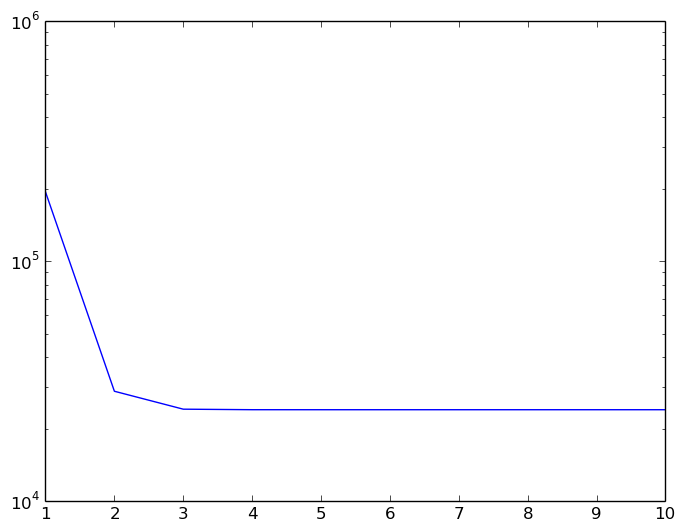

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f780921a710>

In [158]:
obj = proxgrad(X, y, k; maxiters = 10, stepsize = l, w = w_rand)[2]
x = 1:10
semilogy(x,obj)

e) Run the algorithm starting at multiple locations and create a histogram of the objective value. Use 100 iterations for each run.

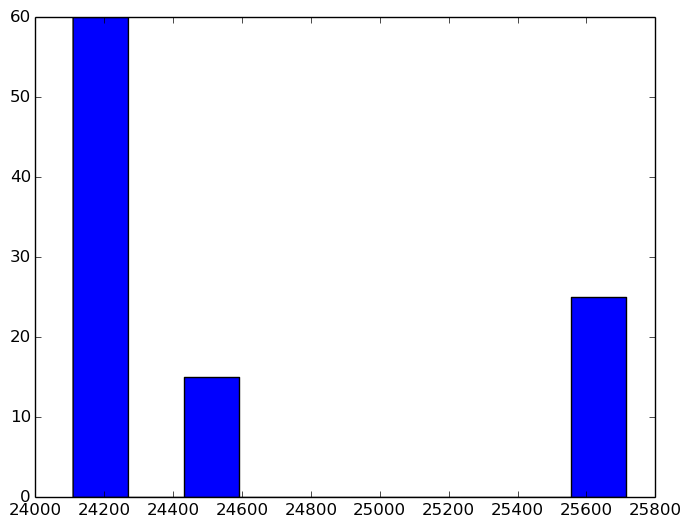

([60.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0],[24109.5,24270.2,24430.8,24591.5,24752.1,24912.8,25073.4,25234.1,25394.7,25555.4,25716.0],Any[PyObject <matplotlib.patches.Rectangle object at 0x7f7802452fd0>,PyObject <matplotlib.patches.Rectangle object at 0x7f7802452ed0>,PyObject <matplotlib.patches.Rectangle object at 0x7f7802531a90>,PyObject <matplotlib.patches.Rectangle object at 0x7f7802531310>,PyObject <matplotlib.patches.Rectangle object at 0x7f780243f990>,PyObject <matplotlib.patches.Rectangle object at 0x7f780243fd50>,PyObject <matplotlib.patches.Rectangle object at 0x7f7801e68d90>,PyObject <matplotlib.patches.Rectangle object at 0x7f7801e68450>,PyObject <matplotlib.patches.Rectangle object at 0x7f7801e68810>,PyObject <matplotlib.patches.Rectangle object at 0x7f7802530d10>])

In [159]:
S = []
for i = 1:100
w_rand = -10*randn(10)
obj = proxgrad(X, y, k; maxiters = 100, stepsize = l, w = w_rand)[2]
   push!(S,obj[100])
end
S
PyPlot.plt[:hist](S)

We see that the objective value varies between 24500, 25500, and 27500. 

f) Run LASSO regression using the proximal gradient method on this problem. You may use the code from the demo in class.

In [160]:
function prox_l1(x::Number, alpha=1)
    if x > alpha
        return x-alpha
    elseif x < -alpha
        return x + alpha
    else
        return 0
    end
end
function prox_l1(x::AbstractArray, alpha=1)
    return reshape(Float64[prox_l1(xi, alpha) for xi in x], size(x))
end

prox_l1 (generic function with 4 methods)

In [161]:
# proximal gradient method for quadratic loss and l1 regularizer
function proxgrad_quad_l1(X, y; maxiters = 10, stepsize = 1, w = zeros(size(X,2)))
    objval = Float64[]
    for i=1:maxiters
        # gradient step
        g = 2X'*(X*w-y) # compute quadratic gradient
        w = w - stepsize*g
        # prox step
        w = prox_l1(w, stepsize)
        # record objective value
        push!(objval, norm(X*w-y)^2 + norm(w,1))
    end
    return w, objval
end

proxgrad_quad_l1 (generic function with 1 method)

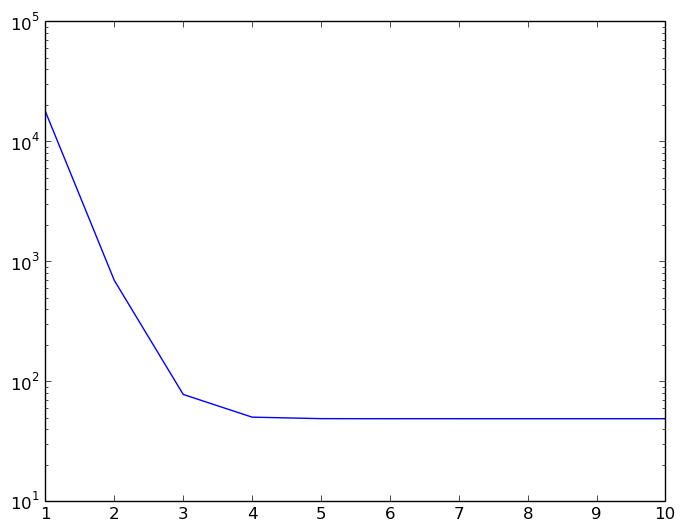

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7803c90b10>

In [162]:
obj = proxgrad_quad_l1(X, y; maxiters = 10, stepsize = l, w = w_rand)[2]
x = 1:10
semilogy(x,obj)

g) Does LASSO converge to the same place starting from different places?

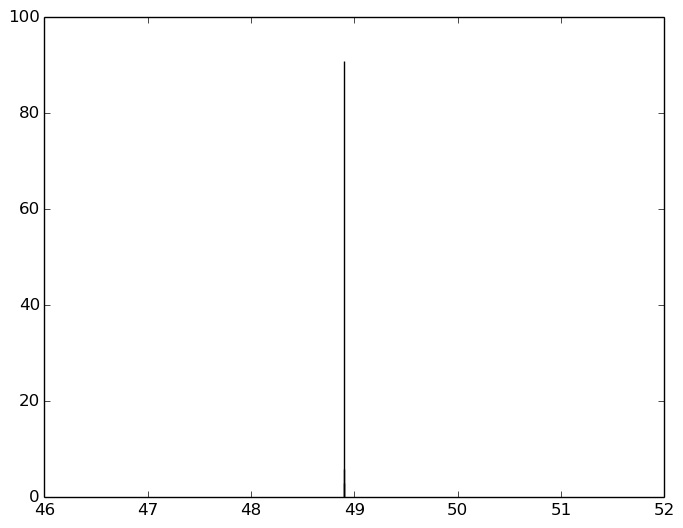

([0.0,0.0,3.0,0.0,0.0,0.0,0.0,91.0,0.0,6.0],[48.8975,48.8975,48.8975,48.8975,48.8975,48.8975,48.8975,48.8975,48.8975,48.8975,48.8975],Any[PyObject <matplotlib.patches.Rectangle object at 0x7f780233db10>,PyObject <matplotlib.patches.Rectangle object at 0x7f780233dfd0>,PyObject <matplotlib.patches.Rectangle object at 0x7f78024a7510>,PyObject <matplotlib.patches.Rectangle object at 0x7f78024a7b90>,PyObject <matplotlib.patches.Rectangle object at 0x7f78024990d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f78024995d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f7802499ad0>,PyObject <matplotlib.patches.Rectangle object at 0x7f7802499fd0>,PyObject <matplotlib.patches.Rectangle object at 0x7f78024b8690>,PyObject <matplotlib.patches.Rectangle object at 0x7f78024b8b90>])

In [163]:
B = []
for i = 1:100
w_rand = -10*randn(10)
obj = proxgrad_quad_l1(X, y; maxiters = 100, stepsize = l, w = w_rand)[2]
   push!(B,obj[100])
end
B
PyPlot.plt[:hist](B)

LASSO does converge to the same place even when you start at different w.

h) Compare the SLS solution to the LASSO solution.

SLS is more sparse, LASSO achieves a better objective value, LASSO is more reliable because we get the same answer everytime

3.
b) Code the stochastic proximal gradient method for the Sparse Least Squares problem.

In [164]:
function proxgrad_stoch(X, y, k; maxiters= 1, stepsize=1, w=1)
    objval = Float64[]
    
    
    
    for i=1:maxiters
        
        indexx = round(Int64, (n-1)*rand()+1)
    x = X[indexx, :]
    y1 = y[indexx]
        x=reshape(x,1,10)
        
        # gradient step
        g = 2n*(x'*((x*w)-y1))
        
        # compute quadratic gradient
        w = w - stepsize*g
        
        
        # prox step
        w = prox_1(w, k)
    
        
        # record objective value
        push!(objval, norm((x*w)-y1)^2)
    end
    return w, objval
end

proxgrad_stoch (generic function with 1 method)

In [165]:
function proxgrad_stoch_batch(X, y, k; maxiters= 1, stepsize=1, w=1)
    objval = Float64[]
    
    
    
    for i=1:maxiters

        
        x = zeros(10,10)
        y1 = zeros(10,1)
for i = 1:10
  indexx = round(Int64, (n-1)*rand()+1)
    x[i,:] = X[indexx,:]
    y1[i,:] = y[indexx,:]
end
        x=reshape(x,10,10)
        
            
            
        # gradient step

        g = ((2n)/10)*(x'*((x*w)-y1))
        
        # compute quadratic gradient
        w = w - stepsize*g
        
        
        # prox step
        w = prox_1(w, k)
    
        
        # record objective value
        push!(objval, norm((x*w)-y1)^2)
    end
    return w, objval
end

proxgrad_stoch_batch (generic function with 1 method)

c) Using the same data as in problem 2, plot the objective value as a function of the number of iterations.

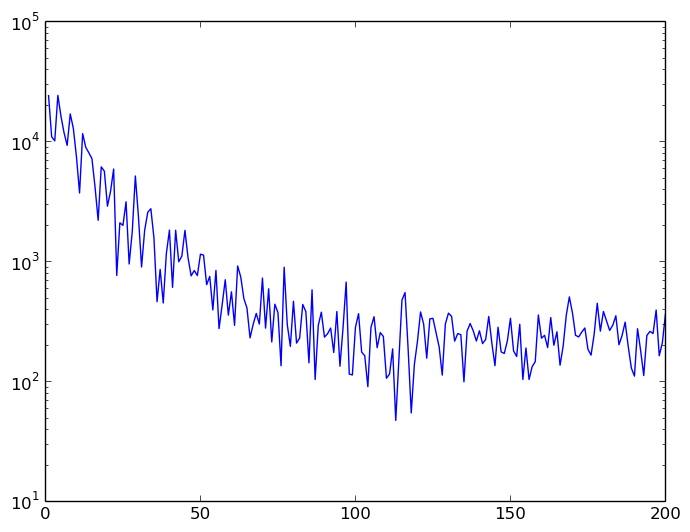

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f78090c5ed0>

In [166]:
n=200
obj = proxgrad_stoch_batch(X, y, k, maxiters = 200, stepsize = 0.00009, w = w_rand)[2]
x = 1:200
semilogy(x,obj)

In [167]:
n=1000
@time obj = proxgrad_stoch(X, y, k, maxiters = 1000, stepsize = 0.00005, w = w_rand)[2]

  0.049138 seconds (39.60 k allocations: 2.079 MB)


1000-element Array{Float64,1}:
  906.881      
  506.842      
  803.583      
 1966.55       
   88.6766     
   90.874      
   15.512      
  325.054      
    3.69269    
  431.833      
  159.646      
    4.3018     
  487.144      
    ⋮          
    0.0250892  
   26.0348     
    4.4071     
    7.35539    
   11.366      
   52.9624     
    0.00316747 
   16.5391     
   25.3041     
    0.000103487
    0.0655375  
   26.7589     

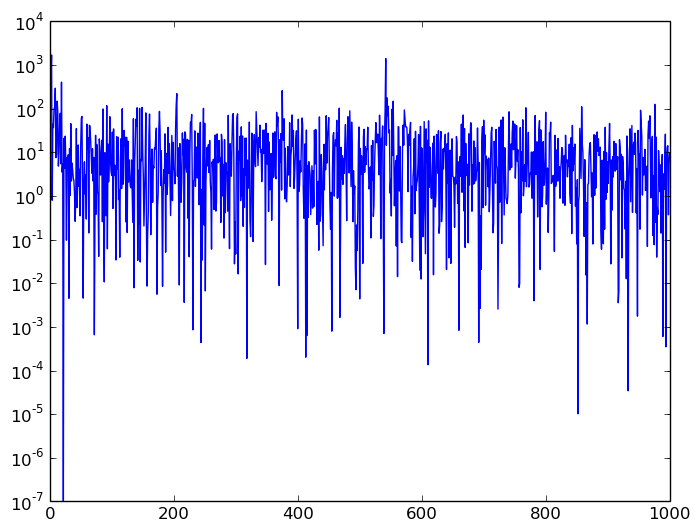

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7808fc3f90>

In [168]:
n=1000
obj = proxgrad_stoch(X, y, k, maxiters = 1000, stepsize = 0.00005, w = w_rand)[2]
x = 1:1000
semilogy(x,obj)

d) How long does the stochastic proximal gradient method take compared to the standard proximal gradient method?

Stochastic proximal gradient method takes a lot longer than the standard proximal gradient method. It takes about 100 iterations for the Stochastic proximal gradient method to converge to the same baseline number, while it only takes the standard method 3 iterations. It takes Stochastic proximal gradient method 0.079722 seconds seconds to run the algorithm, while it takes the standard method 0.013825 seconds (standard method faster).

e) Run the algorithm starting at multiple locations and create a histogram of the objective value. What do you observe?

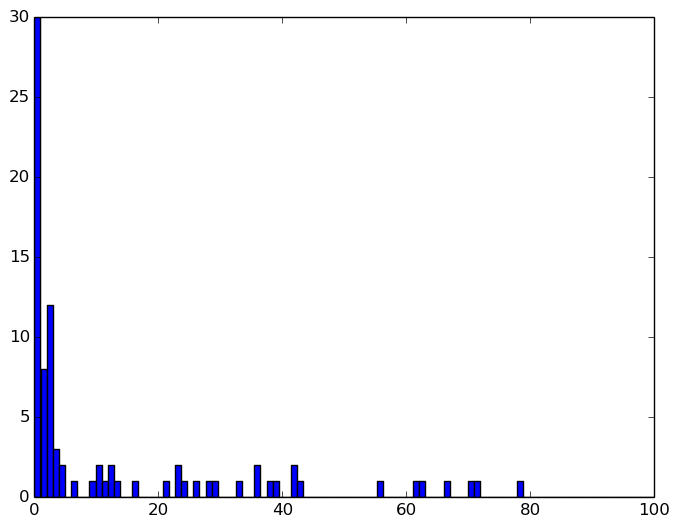

(0,100)

In [169]:
n=1000
S = []
for i = 1:100
w_rand = -10*randn(10)
    obj = proxgrad_stoch(X, y, k; maxiters = 1000, stepsize = 0.00009, w = w_rand)[2]
   push!(S,obj[100])
end
S
PyPlot.plt[:hist](S,5000)
xlim([0,100])

We see that the objective value oscillates between many objective values and these values vary quite a bit though many of them appear near zero.

Problem 4

Part C

In [170]:
function prox_l2(x::Number, alpha=1)
    
    return alpha * x/3
    
end
function prox_l2(x::AbstractArray, alpha=1)
    return reshape(Float64[prox_l1(xi, alpha) for xi in x], size(x))
end

prox_l2 (generic function with 4 methods)

In [171]:
# proximal gradient method for quadratic loss and l1 regularizer
function proxgrad_quad_l2(X, y; maxiters = 10, stepsize = 1, λ = 1, w = zeros(size(X,2)))
    objval = Float64[]
    w_new = Float64[]
    for i=1:maxiters
        # gradient step
        if w!=0
            g = sign(w) #*2X'*(X*w-y)
        else
            g=(-2*rand()) + 1
        end
        
        
           # compute quadratic gradient
        w = w - stepsize*g
        
        
        # prox step
        w = prox_l2(w, stepsize*λ)
    
        
        # record objective value
        push!(objval, norm(X*w-y)^2 + norm(w,1)^2)
        push!(w_new,w)
    end
    return w_new, objval
end

proxgrad_quad_l2 (generic function with 1 method)

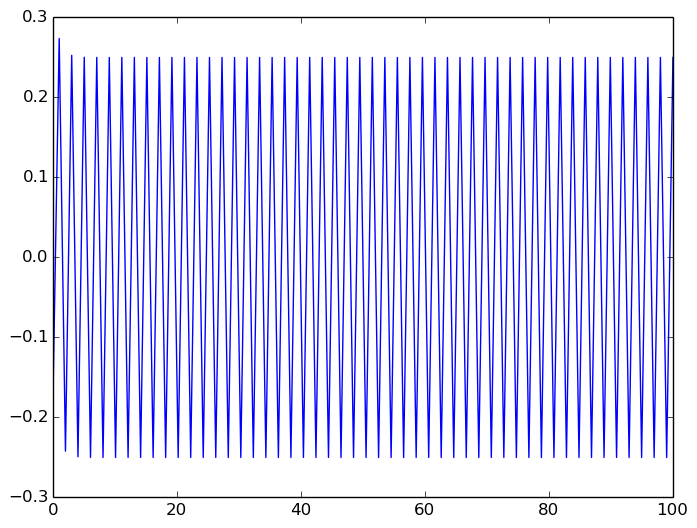

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7808d4cf50>

In [172]:
X=1
y=0
w_rand2 = rand()
ws=proxgrad_quad_l2(X, y; maxiters = 100, stepsize = 1, w = w_rand2)[1]
xX = linspace(0, 100, 100)
plot(xX, ws)

The iterates do not converge.

Part D

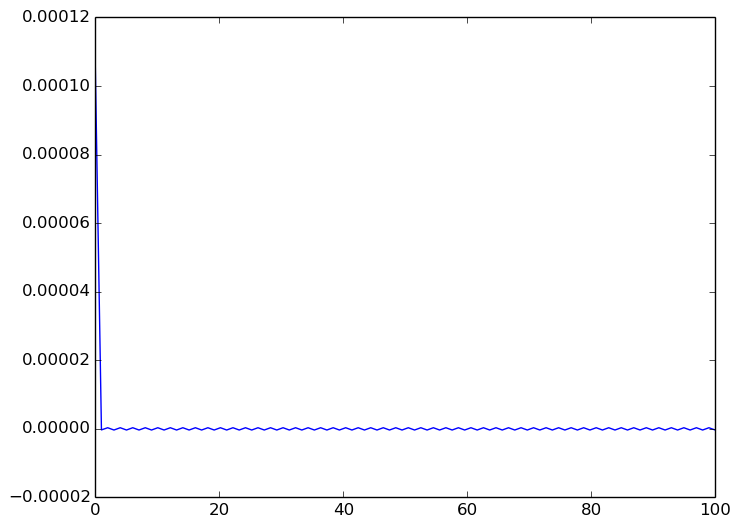

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f780117e310>

In [173]:
X=1
y=0
w_rand2 = rand()
ws=proxgrad_quad_l2(X, y; maxiters = 100, stepsize = 0.001, w = w_rand2)[1]
xX = linspace(0, 100, 100)
plot(xX, ws)

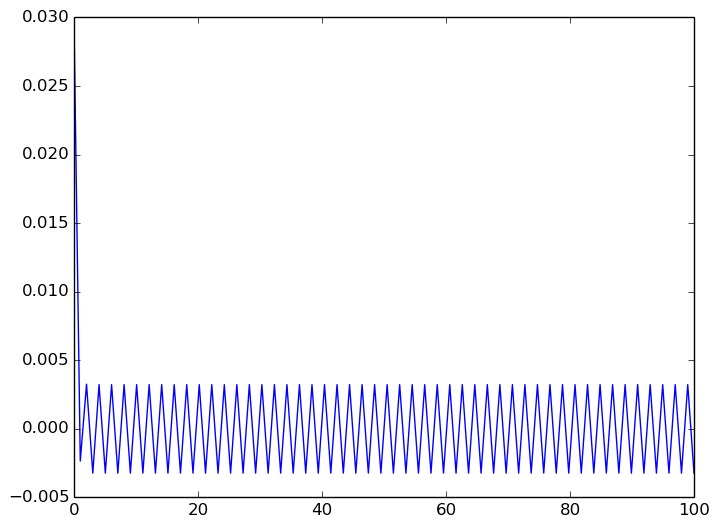

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f78010ada90>

In [174]:
X=1
y=0
w_rand2 = rand()
ws=proxgrad_quad_l2(X, y; maxiters = 100, stepsize = 0.1, w = w_rand2)[1]
xX = linspace(0, 100, 100)
plot(xX, ws)

We see that once w gets near zero, it flunctuates around zero. This is true because if w=0, then the gradient step becomes a random number between -1 and 1 multiplied by the step size. This means that the smaller your step size, the smaller the fluctuating will be.

Part E

The proximal method is not good for this problem when you use a constant step size because when w gets near zero, it takes on a random number and this can change the w value each oscillation instead of trying to make it converge. To solve this, you need a decreasing step size.

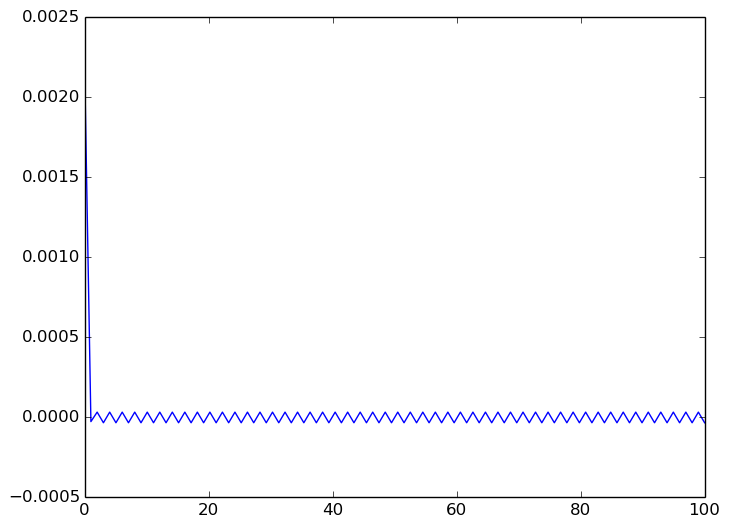

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7800fe8250>

In [175]:
#Current Proximal Gradient method
X=1
y=0
w_rand2 = rand()
ws=proxgrad_quad_l2(X, y; maxiters = 100, stepsize = 0.01, w = w_rand2)[1]
xX = linspace(0, 100, 100)
plot(xX, ws)

In [176]:
# proximal gradient method for quadratic loss and l1 regularizer
function proxgrad_quad_l2_new(X, y; maxiters = 10, stepsize = 1, λ = 1, w = zeros(size(X,2)))
    objval = Float64[]
    w_new = Float64[]
    for i=1:maxiters
        # gradient step
        if w!=0
            g = sign(w) #*2X'*(X*w-y)
        else
            g=(-2*rand()) + 1
        end
        
        stepsize = stepsize/i
           # compute quadratic gradient
        w = w - stepsize*g
        
        
        # prox step
        w = prox_l2(w, stepsize*λ)
    
        
        # record objective value
        push!(objval, norm(X*w-y)^2 + norm(w,1)^2)
        push!(w_new,w)
    end
    return w_new, objval
end

proxgrad_quad_l2_new (generic function with 1 method)

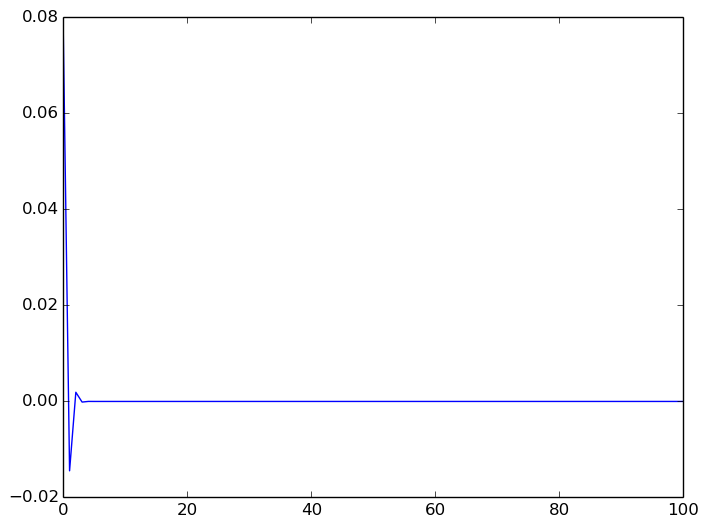

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7808997990>

In [180]:
#Fixed Proximal Gradient
Lipshitz = 1/(2*norm(X)^2)
X=1
y=0
w_rand2 = rand()
ws=proxgrad_quad_l2_new(X, y; maxiters = 100, stepsize = Lipshitz, w = w_rand2)[1]
xX = linspace(0, 100, 100)
plot(xX, ws)